# 0. Setup Paths

In [1]:
import os


In [2]:
CUSTOM_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v23.3/protoc-23.3-win64.zip"
    wget.download(url)
    !move protoc-23.3-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-23.3-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

 25% [...................                                                       ]  729088 / 2806787

 60% [.............................................                             ] 1712128 / 2806787

 97% [........................................................................  ] 2736128 / 2806787

100% [..........................................................................] 2806787 / 2806787        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

D:\TFOD\ROOM\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
D:\TFOD\ROOM\Lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
D:\TFOD\ROOM\Lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: otobuf is an invalid version and will not be supported in a future release
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-311: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-311: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-311: module MAY be using inspect.stack
D:\TFOD\ROOM\Lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDepr

Obtaining file:///D:/TFOD/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [10]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: matplotlib 3.7.2
Uninstalling matplotlib-3.7.2:
  Successfully uninstalled matplotlib-3.7.2


  Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl (422 kB)
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [585 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.2.0]
        python: yes [3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC
                    v.1934 64 bit (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  D:\TFOD\ROOM\Lib\site-packages\setuptools\dist.py:286: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated, consider using implicit namespaces instead (PEP 420).
    warnings.warn(msg, SetuptoolsDeprecationWarning)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpyt

In [11]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Traceback (most recent call last):
  File "D:\TFOD\Tensorflow\models\research\object_detection\builders\model_builder_tf2_test.py", line 21, in <module>
    import tensorflow.compat.v1 as tf
  File "D:\TFOD\ROOM\Lib\site-packages\tensorflow\__init__.py", line 37, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "D:\TFOD\ROOM\Lib\site-packages\tensorflow\python\__init__.py", line 37, in <module>
    from tensorflow.python.eager import context
  File "D:\TFOD\ROOM\Lib\site-packages\tensorflow\python\eager\context.py", line 28, in <module>
    from tensorflow.core.framework import function_pb2
  File "D:\TFOD\ROOM\Lib\site-packages\tensorflow\core\framework\function_pb2.py", line 5, in <module>
    from google.protobuf.internal import builder as _builder
ModuleNotFoundError: No module named 'google.protobuf'


In [12]:
!pip install --upgrade pip
!pip install Cython

!pip install pyyaml<6.0




The system cannot find the file specified.


In [13]:
!pip install protobuf==3.20.0

  Using cached protobuf-3.20.0-py2.py3-none-any.whl (162 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.48.0 requires cloudpickle~=2.2.1, which is not installed.
apache-beam 2.48.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.48.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.48.0 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.48.0 requires fasteners<1.0,>=0.3, which is not installed.
apache-beam 2.48.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.48.0 requires httplib2<0.23.0,>=0.8, which is not installed.
apache-beam 2.48.0 requires objsize<0.7.0,>=0.6.1, which is not installed.
apache-beam 2.48.0 requires orjson<4.0, which is not installed.
apache-beam 2.48.0 requires proto-plus<2,>=1.7.1, which is not installed.
apache-beam 2.48.0 requires pyarrow<12.0.0,>=3.0.0, which is not installed.
apache-beam 2.48.0 requires

In [14]:
import sys
!{sys.executable} -m pip install matplotlib

  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl (7.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.12.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.12.0 requires immutabledict, which is not installed.
tf-models-official 2.12.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.12.0 requires oauth2client, which is not installed.
tf-models-official 2.12.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.12.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.12.0 requires sentencepiece, which is not installed.
tf-models-official 2.12.0 requires seqeval, which is not installed.
tf-models-official 2.12.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.12.0 requires tensorflow-model-optimization>=0.4.1, which is not installed.
tf-models-official 2.12.0 requir

In [15]:
!pip install tensorflow-addons

In [16]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

D:\TFOD\ROOM\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Running tests under Python 3.11.4: D:\TFOD\ROOM\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0710 14:33:22.696809 16648 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0710 14:33:22.701373 16648 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatc

In [17]:
import object_detection

In [18]:
!pip list

Package                      Version  Editable project location
---------------------------- -------- ---------------------------------------
absl-py                      1.4.0
addict                       2.4.0
apache-beam                  2.48.0
apache-beam                  2.48.0
asttokens                    2.2.1
astunparse                   1.6.3
avro-python3                 1.10.2
avro-python3                 1.10.2
avro-python3                 1.10.2
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.5.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contextlib2                  21.6.0
contextlib2                  21.6.0
contourpy                    1.1.0
cycler                       0.11.0
Cython                       0.29.35
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
distlib                      0.3.6
execu

In [19]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  4% [...                                                                     ]  1015808 / 20515344

 16% [...........                                                             ]  3284992 / 20515344

 25% [..................                                                      ]  5332992 / 20515344

 35% [.........................                                               ]  7299072 / 20515344

 44% [................................                                        ]  9125888 / 20515344

 54% [.......................................                                 ] 11116544 / 20515344

 63% [.............................................                           ] 13099008 / 20515344

 71% [...................................................                     ] 14671872 / 20515344

 78% [........................................................                ] 16154624 / 20515344

 85% [.............................................................           ] 17612800 / 20515344

 92% [..................................................................      ] 18964480 / 20515344

 99% [....................................................................... ] 20373504 / 20515344

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [20]:
labels = [{'name':'Human', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [21]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/Vicky-Projects/GenerateTFRecords {paths['SCRIPTS_PATH']}

In [22]:
!pip install pytz

In [23]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [24]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [25]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [26]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [27]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
   

In [28]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [29]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [30]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [31]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [32]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [33]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 --pipeline_config_path=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config --num_train_steps=2000


In [34]:
!pip install gin-config
!pip list

Package                      Version  Editable project location
---------------------------- -------- ---------------------------------------
absl-py                      1.4.0
addict                       2.4.0
apache-beam                  2.48.0
apache-beam                  2.48.0
asttokens                    2.2.1
astunparse                   1.6.3
avro-python3                 1.10.2
avro-python3                 1.10.2
avro-python3                 1.10.2
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.5.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contextlib2                  21.6.0
contextlib2                  21.6.0
contourpy                    1.1.0
cycler                       0.11.0
Cython                       0.29.35
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
distlib                      0.3.6
execu

In [35]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Updated code
import tensorflow as tf

# Create the updated optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, name='SGD')

In [37]:
!pip install openvino-dev[tensorflow2]==2023.0.0

In [38]:
#give in powershell
#!{command}

# 7. Evaluate the Model

In [39]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [40]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 --pipeline_config_path=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8


In [41]:
#!{command} powershell

# 8. Load Train Model From Checkpoint

In [42]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

D:\TFOD\ROOM\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [43]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections


# 9. Detect from an Image

In [44]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [45]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [46]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'human.e8e898a9-1eea-11ee-99b1-48684a5afce3.jpg')

In [47]:
IMAGE_PATH

'Tensorflow\\workspace\\images\\test\\human.e8e898a9-1eea-11ee-99b1-48684a5afce3.jpg'

In [48]:
img = cv2.imread(IMAGE_PATH)
img

array([[[176, 177, 175],
        [176, 177, 175],
        [176, 177, 175],
        ...,
        [170, 171, 169],
        [169, 169, 169],
        [168, 168, 168]],

       [[176, 177, 175],
        [176, 177, 175],
        [177, 178, 176],
        ...,
        [170, 171, 169],
        [169, 169, 169],
        [169, 169, 169]],

       [[177, 178, 176],
        [177, 178, 176],
        [177, 178, 176],
        ...,
        [170, 171, 169],
        [170, 170, 170],
        [169, 169, 169]],

       ...,

       [[ 14,  18,  23],
        [ 13,  17,  22],
        [ 12,  16,  21],
        ...,
        [ 58,  63,  66],
        [ 58,  63,  66],
        [ 57,  62,  65]],

       [[ 13,  16,  20],
        [ 14,  17,  21],
        [ 12,  17,  20],
        ...,
        [ 56,  61,  64],
        [ 55,  62,  65],
        [ 55,  62,  65]],

       [[ 12,  15,  19],
        [ 13,  16,  20],
        [ 12,  17,  20],
        ...,
        [ 55,  60,  63],
        [ 53,  60,  63],
        [ 53,  60,  63]]

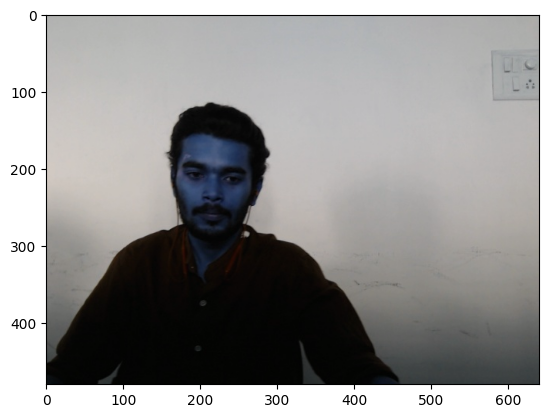

In [49]:
plt.imshow(img)

In [50]:
print(img)

[[[176 177 175]
  [176 177 175]
  [176 177 175]
  ...
  [170 171 169]
  [169 169 169]
  [168 168 168]]

 [[176 177 175]
  [176 177 175]
  [177 178 176]
  ...
  [170 171 169]
  [169 169 169]
  [169 169 169]]

 [[177 178 176]
  [177 178 176]
  [177 178 176]
  ...
  [170 171 169]
  [170 170 170]
  [169 169 169]]

 ...

 [[ 14  18  23]
  [ 13  17  22]
  [ 12  16  21]
  ...
  [ 58  63  66]
  [ 58  63  66]
  [ 57  62  65]]

 [[ 13  16  20]
  [ 14  17  21]
  [ 12  17  20]
  ...
  [ 56  61  64]
  [ 55  62  65]
  [ 55  62  65]]

 [[ 12  15  19]
  [ 13  16  20]
  [ 12  17  20]
  ...
  [ 55  60  63]
  [ 53  60  63]
  [ 53  60  63]]]


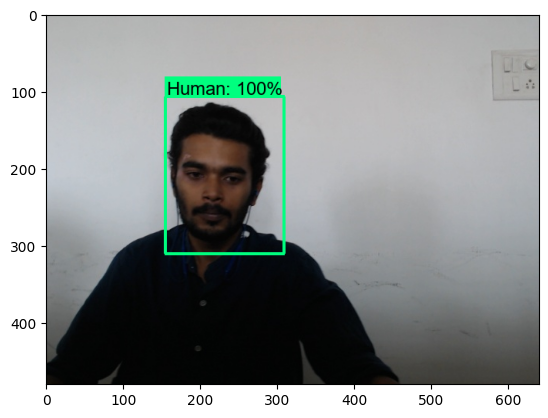

In [51]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, axis=0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [52]:
#!pip uninstall opencv-python-headless -y

In [53]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [54]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [55]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [56]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 --output_directory=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\export


In [57]:
!{command}

D:\TFOD\ROOM\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0710 14:36:49.484131 24704 deprecation.py:641] From D:\TFOD\ROOM\Lib\site-packages\tensorflow\python\autograph\impl\api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future versio

# 11. Conversion to TFJS

In [58]:
!pip install tensorflowjs

In [59]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [60]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\export\saved_model Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\tfjsexport


In [61]:
!pip install --upgrade tensorflowjs


  Using cached tensorflowjs-4.8.0-py3-none-any.whl (85 kB)
  Using cached flax-0.6.2-py3-none-any.whl (189 kB)
INFO: pip is looking at multiple versions of tensorflowjs to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflowjs-4.7.0-py3-none-any.whl (85 kB)
  Using cached tensorflowjs-4.6.0-py3-none-any.whl (85 kB)
  Using cached tensorflowjs-4.5.0-py3-none-any.whl (85 kB)
  Using cached tensorflowjs-4.4.0-py3-none-any.whl (85 kB)
                                              0.0/225.9 kB ? eta -:--:--
     ----------                              61.4/225.9 kB 1.6 MB/s eta 0:00:01
     ------------------                     112.6/225.9 kB 1.3 MB/s eta 0:00:01
     ----------------------------------     204.8/225.9 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 225.9/225.9 kB 1.5 MB/s eta 0:00:00
  Using cached protobuf-3.19.6-py2.py3-none-any.whl (162 kB)
  Using cached tensorflowjs-4.3.0-py3-none-any.whl

In [62]:
!pip install protobuf==3.20.*


  Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.48.0 requires cloudpickle~=2.2.1, which is not installed.
apache-beam 2.48.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.48.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.48.0 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.48.0 requires fasteners<1.0,>=0.3, which is not installed.
apache-beam 2.48.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.48.0 requires httplib2<0.23.0,>=0.8, which is not installed.
apache-beam 2.48.0 requires objsize<0.7.0,>=0.6.1, which is not installed.
apache-beam 2.48.0 requires orjson<4.0, which is not installed.
apache-beam 2.48.0 requires proto-plus<2,>=1.7.1, which is not installed.
apache-beam 2.48.0 requires pyarrow<12.0.0,>=3.0.0, which is not installed.
apache-beam 2.48.0 requires

In [63]:
!{command}

Writing weight file Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\tfjsexport\model.json...


# 12. Conversion to TFLite

In [64]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [65]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [66]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 --output_directory=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\tfliteexport


In [67]:
!{command}

D:\TFOD\ROOM\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
I0710 14:39:31.886742 15916 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0710 14:39:36.393575 15916 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0710 14:39:39.181959 15916 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
W0710 14:39:40.648679 15916 save_impl.py:66] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch ob

In [68]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [69]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [70]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [71]:
!{command}

2023-07-10 14:41:06.901015: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-07-10 14:41:06.901152: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


# 13. Zip and Export Models 

In [72]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [73]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'